In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris_data = pd.read_csv("E:\\Datasets\\iris_data.csv")

In [43]:
iris_data.head(123)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,target
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...,...
118,119,7.7,2.6,6.9,2.3,Iris-virginica,2
119,120,6.0,2.2,5.0,1.5,Iris-virginica,2
120,121,6.9,3.2,5.7,2.3,Iris-virginica,2
121,122,5.6,2.8,4.9,2.0,Iris-virginica,2


In [5]:
from sklearn.preprocessing import LabelEncoder
label_encoder_1=LabelEncoder()
iris_labels=label_encoder_1.fit_transform(iris_data.Species )
iris_data['target']=iris_labels
iris_data['target'].value_counts()


0    50
1    50
2    50
Name: target, dtype: int64

In [26]:
X = iris_data.iloc[:,1:-2].values
Y = iris_data.iloc[:,-1].values

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20,random_state=0)

In [28]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

In [46]:
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'manhattan', p = 2)  

In [47]:
classifier.fit(X_train,Y_train)

KNeighborsClassifier(metric='manhattan')

In [48]:
y_pred = classifier.predict(X_test)
Y_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [49]:
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [51]:
prediction_input = [[7.7,2.6,6.9,2.3]]
scaled_input = sc_x.transform(prediction_input)
raw_prediction = classifier.predict(scaled_input)
print("Raw Prediction Output (Probabilities) :" , raw_prediction)

#Find prediction
prediction = np.argmax(raw_prediction)
print("Prediction is ", label_encoder_1.inverse_transform([prediction]))

Raw Prediction Output (Probabilities) : [2]
Prediction is  ['Iris-setosa']


In [52]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,y_pred)
cm

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]], dtype=int64)

<AxesSubplot:>

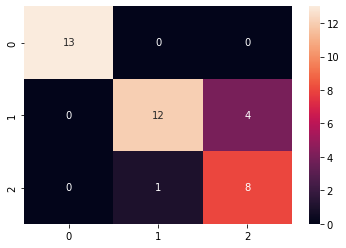

In [14]:
sns.heatmap(cm,annot=True)

In [15]:
from matplotlib.colors import ListedColormap
X_set, Y_set = X_train,Y_train
X1,X2 = np.meshgrid(np.arange(start = X_set[:,0].min()-1, stop = X_set[:,0].max()+1, step = 0.01),
                    np.arange(start = X_set[:,1].min()-1, stop = X_set[:,1].max()+1, step = 0.01))
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),alpha = 0.75,cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j,0],X_set[Y_set == j,1],
               c= ListedColormap(("red","green"))(i), label=j)
plt.title("KNN Model")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()
plt.show()

ValueError: X has 2 features, but KNeighborsClassifier is expecting 3 features as input.

In [ ]:
from matplotlib.colors import ListedColormap
X_set, Y_set = X_test,Y_test
X1,X2 = np.meshgrid(np.arange(start = X_set[:,0].min()-1, stop = X_set[:,0].max()+1, step = 0.01),
                    np.arange(start = X_set[:,1].min()-1, stop = X_set[:,1].max()+1, step = 0.01))
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),alpha = 0.75,cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j,0],X_set[Y_set == j,1],
               c= ListedColormap(("black","white"))(i), label=j)
plt.title("Logistic Regression Model")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()
plt.show()